# **Data Analytics**
------

## Network Analytics Lab

The tutorial is adapted from: https://github.com/vtraag/4TU-CSS and https://igraph.org/python/doc/tutorial/tutorial.html

## IPython Notebook

The **IPython Notebook**, or Jupyter Notebook, is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media. For more details on the Jupyter Notebook, please see the Jupyter website.

### Install

```
pip install jupyter
```

### Running Jupyter

You can start the dashboard on any system via the command prompt by entering the command 
```
jupyter notebook
```
The URL for the dashboard will be something like http://localhost:8888/tree. 


### Cells

Cells form the body of a notebook. There are two main cell types:

- A **code cell** contains code to be executed in the kernel and displays its output below.
- A **Markdown cell** contains text formatted using Markdown and displays its output in-place when it is run.


### Shortcuts

- **Shift + Enter** run the current cell, select below
- **Ctrl + Enter** run selected cells
- **Alt + Enter** run the current cell, insert below
- **Ctrl + S** save and checkpoint

In [1]:
print('Hello World!')

Hello World!


# Goals

- **Introduce** igraph library.
- **Learn** how to interact with graph structures. 
- **Discover** how to compute network centrality measures.

## Import packages

In [ ]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph

Password:

In [1]:
import igraph as ig

# Upload the `__init__.py` file using the `Files` column on the left 


In [0]:
!mv __init__.py /usr/local/lib/python3.6/dist-packages/igraph/drawing


#Now, you should restart runtime (ctrl+M) and run only the following cell (**NOT** all the cells above) and it should work

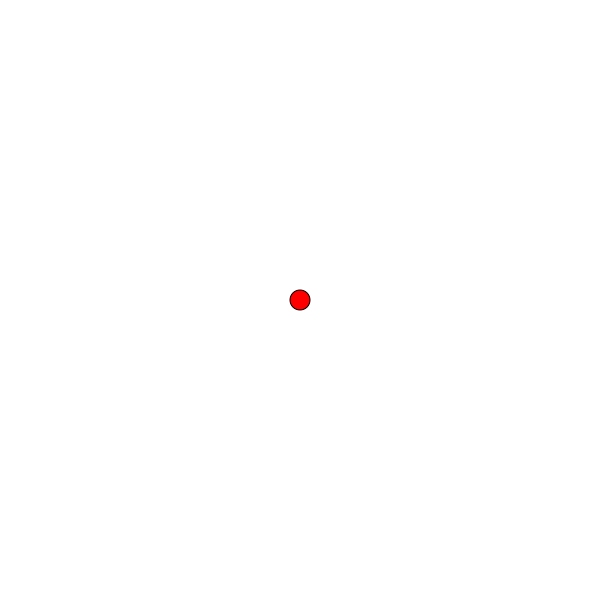

In [1]:
import igraph as ig
G = ig.Graph()
G.add_vertices([1])

ig.plot(G)

In [8]:
# Networks
#import igraph as ig

# Computation
import numpy as np
np.random.seed(0)
import scipy
import random
random.seed(0)

# Data
import pandas as pd
import csv

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Windows: Install **pycairo** from https://www.lfd.uci.edu/~gohlke/pythonlibs/#pycairo

*pip install pycairo-1.18.0-cp36-cp36m-win_amd64.whl*

It is also possible to install packages inside jupyter notebooks

In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

<img src="https://images.g2crowd.com/uploads/product/image/social_landscape/social_landscape_1523469721/igraph.png" width="40%" />

**igraph** is a collection of network analysis tools with the emphasis on efficiency, portability and ease of use. igraph is open source and free. igraph can be programmed in R, Python Mathematica and C/C++.

### Creating a graph from scratch

Assuming that you have started igraph successfully, it is time to create your first igraph graph. This is pretty simple:

In [4]:
g = ig.Graph()

The above statement created an undirected graph with no vertices or edges and assigned it to the variable g. To confirm that it's really an igraph graph, we can print it:

In [5]:
g

This tells us that g is an instance of igraph's Graph class and that it is currently living at the memory address 0x1b5b3eed048 (the exact output will almost surely be different for your platform). To obtain a more user-friendly output, we can try to print the graph using Python’s print statement:

In [6]:
print(g)

IGRAPH U--- 0 0 --


It is possible to manually create a graph from vertices and edges

In [7]:
G = ig.Graph(directed=False)
G.add_vertices(n=4)
G.add_edges([(0, 1),
             (0, 2),
             (0, 3),
             (1, 2),
             (1, 3),
             (2, 3)])

We can get a summary of the graph, providing some basic information on the graph

In [8]:
G.summary()

'IGRAPH U--- 4 6 -- '

The result indicates this graph is undirected (indicated by the U) has 4 nodes and 6 edges. The information on the number of nodes and edges can also be obtained using functions.

In [9]:
n = G.vcount()
m = G.ecount()
print('{0} nodes, {1} edges'.format(n, m))

4 nodes, 6 edges


In [10]:
print(G)

IGRAPH U--- 4 6 --
+ edges:
0 -- 1 2 3   1 -- 0 2 3   2 -- 0 1 3   3 -- 0 1 2


We can also add nodes and edges to a graph.

In [11]:
G.add_edges([(2,0)])
G.add_vertices(3)
G.add_edges([(2,3),(3,4),(4,5),(5,3)])

In [13]:
# How many nodes and edges?

n = G.vcount()
m = G.ecount()
print('{0} nodes, {1} edges'.format(n, m))

7 nodes, 11 edges


Vertex and edge IDs are always continuous, and a direct consequence of this fact is that if you happen to delete an edge, chances are that some (or all) of the edges will be renumbered. Moreover, if you delete a vertex, even the vertex IDs will change. Edges can be deleted by *delete_edges()* and it requires a list of edge IDs to be deleted (or a single edge ID). Vertices can be deleted by *delete_vertices()* and you may have already guessed that it requires a list of vertex IDs to be deleted (or a single vertex ID). If you do not know the ID of an edge you wish to delete, but you know the IDs of the vertices at its two endpoints, you can use *get_eid()* to get the edge ID.

In [17]:
print(G)

IGRAPH U--- 7 11 --
+ edges:
0 -- 1 2 2 3       2 -- 0 0 1 3 3     4 -- 3 5           6 --
1 -- 0 2 3         3 -- 0 1 2 2 4 5   5 -- 3 4


In [19]:
# Return the ID of the edge between 2 and 3 in order to delete it
G.get_eid(2, 3)

7

In [22]:
## Remove the edge between node 2 and 3
G.delete_edges(7)

n = G.vcount()
m = G.ecount()
print('{0} nodes, {1} edges'.format(n, m))
print(G)

7 nodes, 9 edges
IGRAPH U--- 7 9 --
+ edges:
0 -- 1 2 2 3   2 -- 0 0 1 3   4 -- 5         6 --
1 -- 0 2 3     3 -- 0 1 2 5   5 -- 3 4


In [25]:
# %load solutions/sol1.py


## Types of Graphs in igraph

*igraph* includes a large set of graph generators which can be divided into two groups: deterministic and stochastic graph generators. Deterministic generators produce the same graph if you call them with exactly the same parameters, while stochastic generators produce a different graph every time.


**Graph.Tree()** generates a regular tree graph. No matter how many times you call **Graph.Tree()**, the generated graph will always be the same if you use the same parameters

In [26]:
g = ig.Graph.Tree(27, children = 3)
print(g)

IGRAPH U--- 27 26 --
+ edges:
0--1 0--2 0--3 1--4 1--5 1--6 2--7 2--8 2--9 3--10 3--11 3--12 4--13 4--14
4--15 5--16 5--17 5--18 6--19 6--20 6--21 7--22 7--23 7--24 8--25 8--26


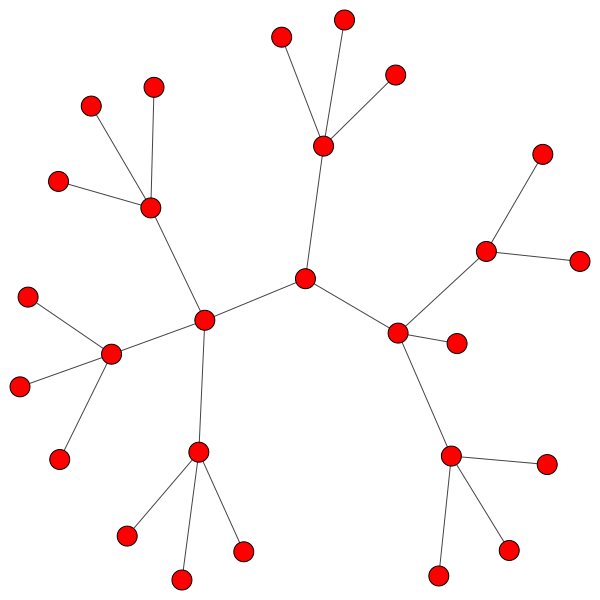

In [27]:
ig.plot(g)

### **Complete** graph

In [28]:
g = ig.Graph.Full(6)
print(g)

IGRAPH U--- 6 15 --
+ edges:
0 -- 1 2 3 4 5   2 -- 0 1 3 4 5   4 -- 0 1 2 3 5
1 -- 0 2 3 4 5   3 -- 0 1 2 4 5   5 -- 0 1 2 3 4


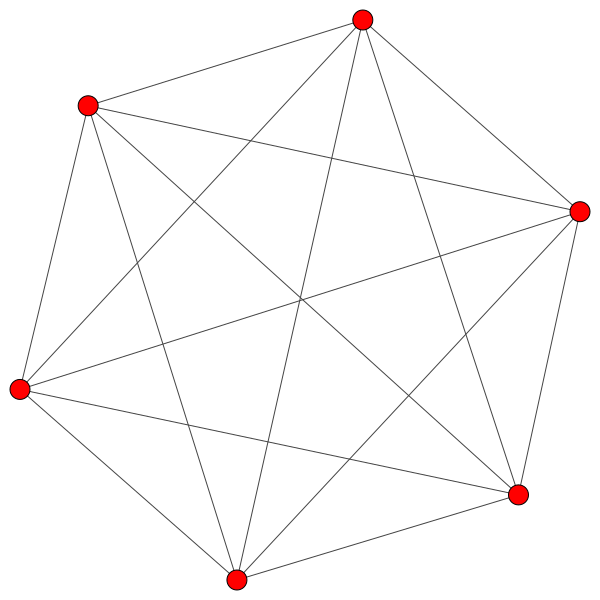

In [29]:
ig.plot(g)

### Lattices

In [30]:
g = ig.Graph.Lattice([5,5], circular = False)
print(g)

IGRAPH U--- 25 40 --
+ edges:
 0 --  1  5          7 --  2  6  8 12   14 --  9 13 19      21 -- 16 20 22
 1 --  0  2  6       8 --  3  7  9 13   15 -- 10 16 20      22 -- 17 21 23
 2 --  1  3  7       9 --  4  8 14      16 -- 11 15 17 21   23 -- 18 22 24
 3 --  2  4  8      10 --  5 11 15      17 -- 12 16 18 22   24 -- 19 23
 4 --  3  9         11 --  6 10 12 16   18 -- 13 17 19 23
 5 --  0  6 10      12 --  7 11 13 17   19 -- 14 18 24
 6 --  1  5  7 11   13 --  8 12 14 18   20 -- 15 21


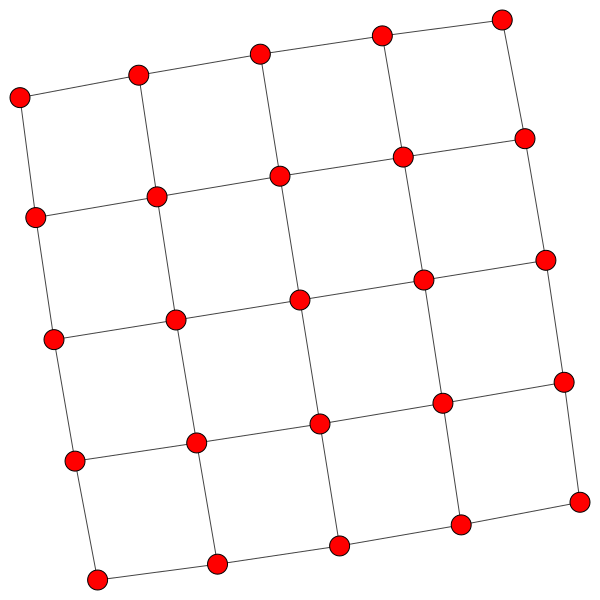

In [31]:
ig.plot(g)

### Stars

In [32]:
g = ig.Graph.Star(10)
print(g)

IGRAPH U--- 10 9 --
+ edges:
0--1 0--2 0--3 0--4 0--5 0--6 0--7 0--8 0--9


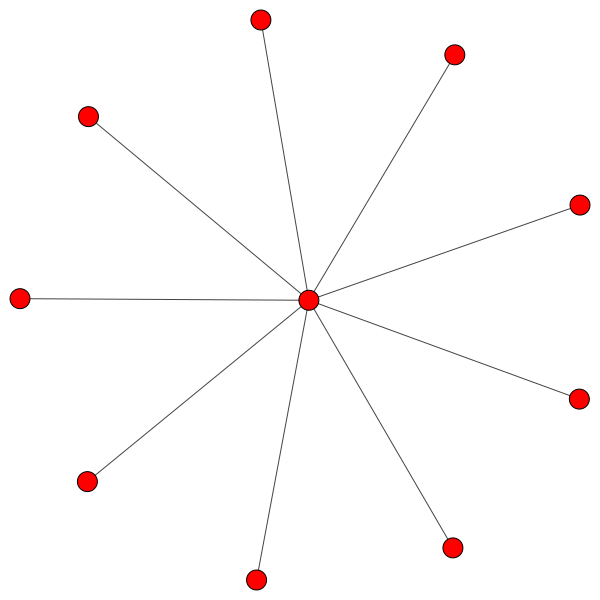

In [33]:
ig.plot(g)

## Read Networks

The csv file *dolphin_edges.csv* in the data folder contains the edge list of the undirected social network of 62 dolphins in a community living off Doubtful Sound, New Zealand.

In [9]:
dolphinEdges = pd.read_csv("data/dolphin_edges.csv",header=None)
dolphinEdges

,0,1
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
5,DN16,Gallatin
6,DN21,Gallatin
7,Feather,Gallatin
8,Beak,Grin
9,CCL,Grin


In [10]:
reader = csv.reader(open("data/dolphin_edges.csv"))
g = ig.Graph.TupleList(reader)
print(g)

IGRAPH UN-- 62 159 --
+ attr: name (v)
+ edges (vertex names):
        CCL -- Double, Grin, Zap
     Double -- CCL, Kringel, Oscar, SN4, Topless, Zap
       DN16 -- Feather, Gallatin, Wave, Web
    Feather -- DN16, DN21, Gallatin, Jet, Ripplefluke, SN90, Web
       DN21 -- Feather, Gallatin, Jet, Upbang, Wave, Web
       Beak -- Fish, Grin, Haecksel, SN9, SN96, TR77
       Fish -- Beak, Bumper, Patchback, SN96, TR77
     Bumper -- Fish, SN96, Thumper, Zipfel
   Gallatin -- DN16, Feather, DN21, Jet, Ripplefluke, SN90, Upbang, Web
       Grin -- CCL, Beak, Hook, MN83, Scabs, Shmuddel, SN4, SN63, SN9,
Stripes, TR99, TSN103
   Haecksel -- Beak, Jonah, MN83, SN9, Topless, Vau, Zap
       Hook -- Grin, Kringel, Scabs, SN4, SN63, TR99
 Beescratch -- Jet, Knit, Notch, Number1, Oscar, SN100, SN90, Upbang
        Jet -- Feather, DN21, Gallatin, Beescratch, MN23, Mus, Number1, Quasi,
Web
      Jonah -- Haecksel, Kringel, MN105, MN83, Patchback, Topless, Trigger
       Knit -- Beescratch, DN63, PL

In [4]:
G = ig.Graph.Read("data/karate.gml", format="gml")
print(G)

IGRAPH U--- 34 78 --
+ attr: id (v)
+ edges:
 0 --  1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31      25 -- 23 24 31
 1 --  0  2  3  7 13 17 19 21 30                           26 -- 29 33
 2 --  0  1  3  7  8  9 13 27 28 32                        27 --  2 23 24 33
 3 --  0  1  2  7 12 13                                    28 --  2 31 33
 4 --  0  6 10                                             29 -- 23 26 32 33
 5 --  0  6 10 16                                          30 --  1  8 32 33
 6 --  0  4  5 16                                          31 --  0 24 25 28
32 33
 7 --  0  1  2  3                                          32 --  2  8 14 15
18 20 22 23 29 30 31 33
 8 --  0  2 30 32 33                                       33 --  8  9 13 14
15 18 19 20 22 23 26 27 28 29 30 31 32
 9 --  2 33
10 --  0  4  5
11 --  0
12 --  0  3
13 --  0  1  2  3 33
14 -- 32 33
15 -- 32 33
16 --  5  6
17 --  0  1
18 -- 32 33
19 --  0  1 33
20 -- 32 33
21 --  0  1
22 -- 32 33
23 -- 25 27 29 32 33
24 -

This network is so famous that it is built in *igraph*: the karate club network constructed by Zachary (1977).

In [12]:
G = ig.Graph.Famous('Zachary')

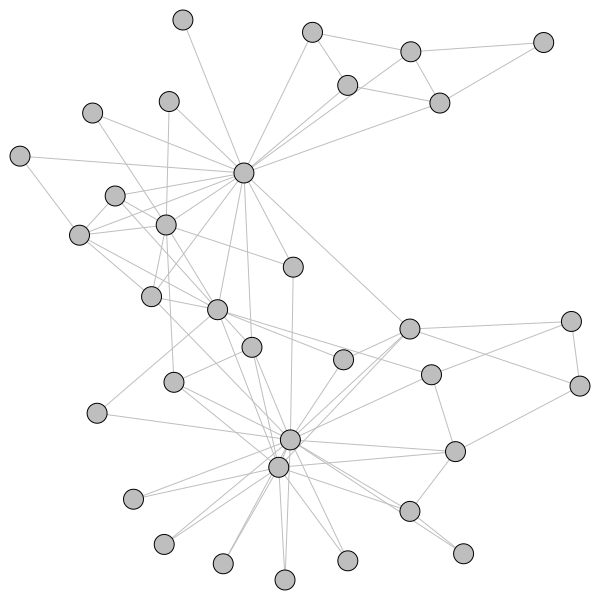

In [13]:
G['layout'] = G.layout_fruchterman_reingold()
G.vs['color'] = 'gray'
G.es['color'] = 'gray'
ig.plot(G)

In *igraph* the terms vertex and edges are used throughout, and they can be accessed through a so-called **VertexSequence** and **EdgeSequence**. You can make different selections of vertices and edges, either based on **attributes** or simply specifying specific (vertex or edge) indices. The functionality on vertex and edge sequences is quite extensive.

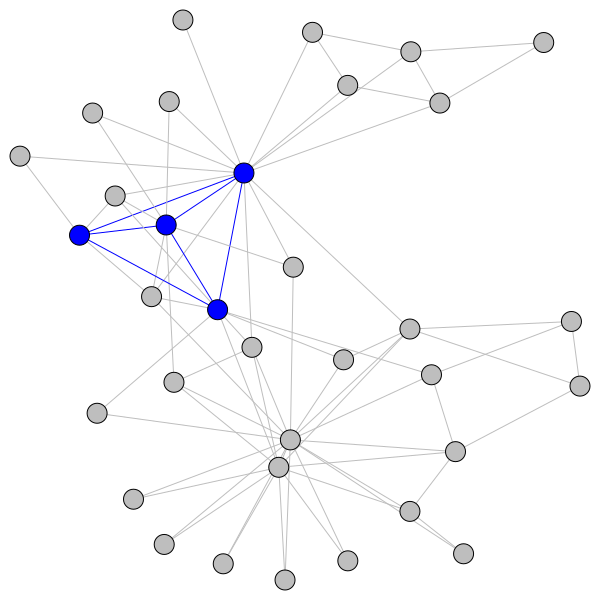

In [14]:
vs = G.vs[[0, 1, 2, 3]]
es = G.es.select(_within=vs)
vs['color'] = 'blue'
es['color'] = 'blue'
ig.plot(G)

# Neighbours

A common task is to subset all of the neighbours of a particular vertex. 

In [15]:
neighbors = G.neighbors(4)
print(neighbors, G.degree(4))

[0, 6, 10] 3


We can also obtain all neighbours within a distance, *d*, of a number of targets


In [22]:
neighborhood = G.neighborhood(4, order = 2)
print(neighborhood)
print(len(neighborhood))

[4, 0, 6, 10, 1, 2, 3, 5, 7, 8, 11, 12, 13, 17, 19, 21, 31, 16]
18


From this neighborhood, we can induce a subgraph

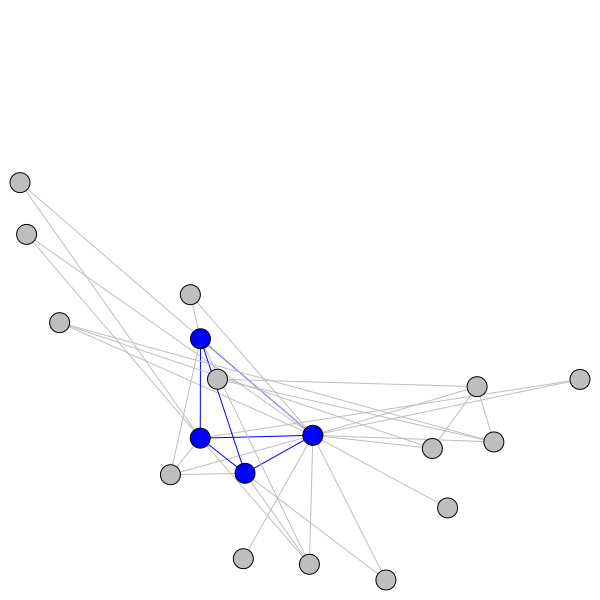

In [43]:
induced_subgraph = G.induced_subgraph(neighborhood)
ig.plot(induced_subgraph)

In [21]:
# How many nodes, when order is set to 3?

neighborhood = G.neighborhood(4, order = 3)
print(neighborhood)
print(len(neighborhood))

[4, 0, 6, 10, 1, 2, 3, 5, 7, 8, 11, 12, 13, 17, 19, 21, 31, 16, 30, 9, 27, 28, 32, 33, 24, 25]
26


## Attributes

All objects in *igraph*, vertices and edges, can have attributes. Let's import the dataset of *Les Miserables*.

**Les Miserables**: coappearance weighted network of characters in the novel Les Miserables. D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).

In [23]:
G = ig.Graph.Read("data/lesmiserables.gml", format="gml")
print(G)

IGRAPH U--- 77 254 --
+ attr: id (v), label (v), value (e)
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 11
 1 --  0
 2 --  0  3 11
 3 --  0  2 11
 4 --  0
 5 --  0
 6 --  0
 7 --  0
 8 --  0
 9 --  0
10 -- 11
11 --  0  2  3 10 12 13 14 15 23 24 25 26 27 28 29 31 32 33 34 35 36 37 38 43
44 48 49 51 55 58 64 68 69 70 71 72
12 -- 11 23
13 -- 11
14 -- 11
15 -- 11
16 -- 17 18 19 20 21 22 23 26 55
17 -- 16 18 19 20 21 22 23
18 -- 16 17 19 20 21 22 23
19 -- 16 17 18 20 21 22 23
20 -- 16 17 18 19 21 22 23
21 -- 16 17 18 19 20 22 23
22 -- 16 17 18 19 20 21 23
23 -- 11 12 16 17 18 19 20 21 22 24 25 27 29 30 31
24 -- 11 23 25 26 27 41 42 50 68 69 70
25 -- 11 23 24 26 27 39 40 41 42 48 55 68 69 70 71 75
26 -- 11 16 24 25 27 43 49 51 54 55 72
27 -- 11 23 24 25 26 28 29 31 33 43 48 58 68 69 70 71 72
28 -- 11 27 44 45
29 -- 11 23 27 34 35 36 37 38
30 -- 23 31
31 -- 11 23 27 30
32 -- 11
33 -- 11 27
34 -- 11 29 35 36 37 38
35 -- 11 29 34 36 37 38
36 -- 11 29 34 35 37 38
37 -- 11 29 34 35 36 38
38 -- 11 29

We can access to the attributes both of nodes and edges

In [24]:
G.vs.attribute_names()

['id', 'label']

In [25]:
G.vs.get_attribute_values('label')

['Myriel',
 'Napoleon',
 'MlleBaptistine',
 'MmeMagloire',
 'CountessDeLo',
 'Geborand',
 'Champtercier',
 'Cravatte',
 'Count',
 'OldMan',
 'Labarre',
 'Valjean',
 'Marguerite',
 'MmeDeR',
 'Isabeau',
 'Gervais',
 'Tholomyes',
 'Listolier',
 'Fameuil',
 'Blacheville',
 'Favourite',
 'Dahlia',
 'Zephine',
 'Fantine',
 'MmeThenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Perpetue',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Pontmercy',
 'Boulatruelle',
 'Eponine',
 'Anzelma',
 'Woman2',
 'MotherInnocent',
 'Gribier',
 'Jondrette',
 'MmeBurgon',
 'Gavroche',
 'Gillenormand',
 'Magnon',
 'MlleGillenormand',
 'MmePontmercy',
 'MlleVaubois',
 'LtGillenormand',
 'Marius',
 'BaronessT',
 'Mabeuf',
 'Enjolras',
 'Combeferre',
 'Prouvaire',
 'Feuilly',
 'Courfeyrac',
 'Bahorel',
 'Bossuet',
 'Joly',
 'Grantaire',
 'MotherPlutarch',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnasse',
 'Tou

In [26]:
G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x117c674f8>, 0, {'id': 0.0, 'label': 'Myriel'})

In [27]:
G.es.attribute_names()

['value']

In [28]:
G.es.get_attribute_values('value')

[1.0,
 8.0,
 10.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 3.0,
 3.0,
 5.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 5.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 2.0,
 9.0,
 2.0,
 7.0,
 13.0,
 1.0,
 12.0,
 4.0,
 31.0,
 1.0,
 1.0,
 17.0,
 5.0,
 5.0,
 1.0,
 1.0,
 8.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0,
 9.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 6.0,
 12.0,
 1.0,
 1.0,
 21.0,
 19.0,
 1.0,
 2.0,
 5.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 7.0,
 7.0,
 6.0,
 1.0,
 4.0,
 15.0,
 5.0,
 6.0,
 2.0,
 1.0,
 4.0,
 2.0,
 2.0,
 6.0,
 2.0,
 5.0,
 1.0,
 1.0,
 9.0,
 17.0,
 13.0,
 7.0,
 2.0,
 1.0,

In [29]:
G.es[0]

igraph.Edge(<igraph.Graph object at 0x117c674f8>, 0, {'value': 1.0})

In [30]:
G.es[G.get_eid(2,3)]

igraph.Edge(<igraph.Graph object at 0x117c674f8>, 3, {'value': 6.0})

## Graph Plot

A layout is just a set of x and y coordinates. They can be specified manually but more often we will use
one of the *layout_functions*. Layout algorithms can either be called directly or using the common layout method called layout():


In [31]:
layout = G.layout_kamada_kawai()
layout = G.layout("kamada_kawai")

In [1]:
#G['layout'] = G.layout_fruchterman_reingold()
G['layout'] = G.layout_circle()
# G['layout'] = G.layout_star()
# G['layout'] = G.layout_grid()
# G['layout'] = G.layout_kamada_kawai()
ig.plot(G)

NameError: name 'G' is not defined

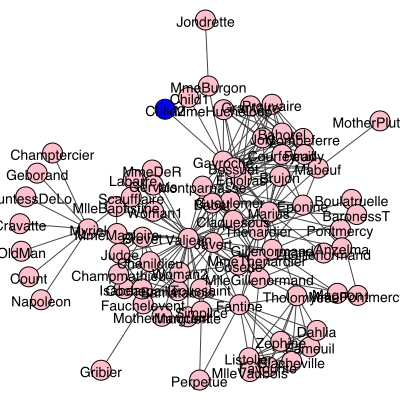

In [41]:
G.vs["color"] = ["blue" if (l == "Child2") else "pink" for l in G.vs["label"]]
ig.plot(G, layout = layout, bbox = (400, 400), margin = 20)

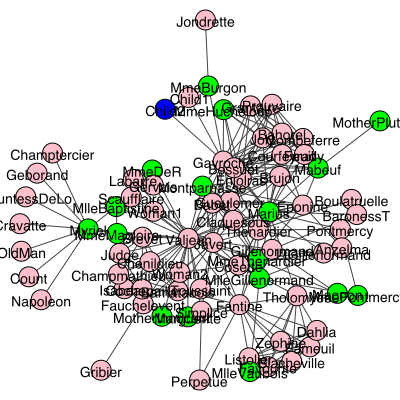

In [52]:
# Color all the nodes which name start with M
G.vs["color"] = ["blue" if (l == "Child2") else "green" if (l[0] == "M") else "pink" for l in G.vs["label"]]
ig.plot(G, layout = layout, bbox = (400, 400), margin = 20)

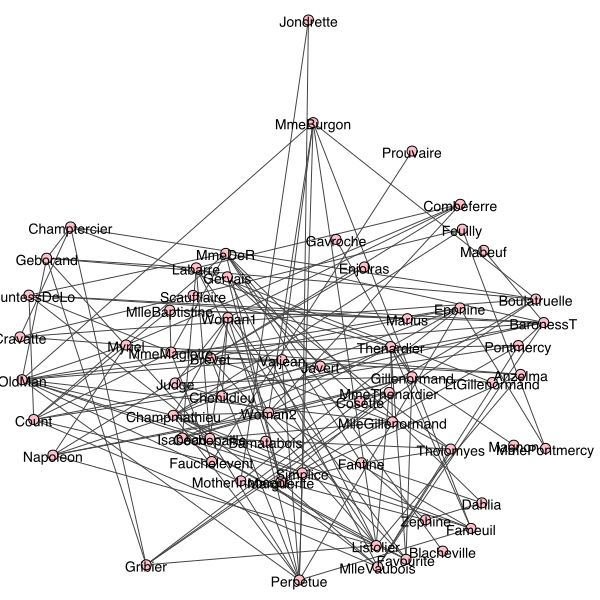

In [53]:
visual_style = {}
visual_style["vertex_size"] = 10
visual_style["vertex_color"] = ["blue" if (l == "Child2") else "pink" for l in G.vs["label"]]
visual_style["vertex_label"] = G.vs["label"]
#visual_style["edge_width"] = 
visual_style["layout"] = layout
ig.plot(g, **visual_style)

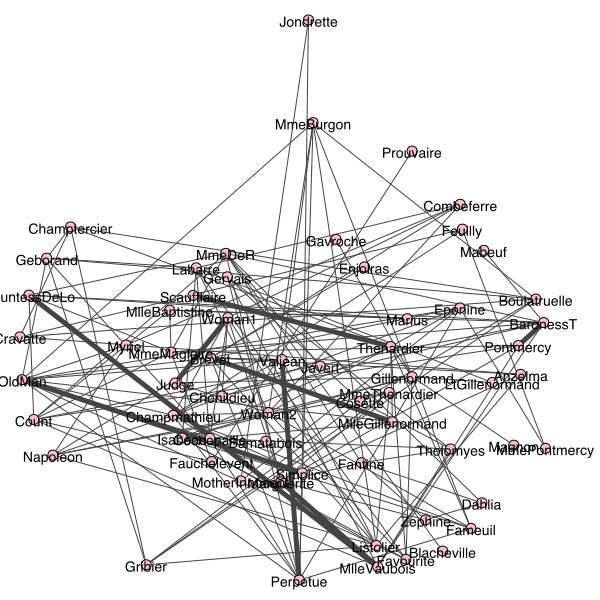

In [65]:
# Set to 5 the edge_width of the edges that have an edge value higher than 10
 
visual_style["edge_width"] = [5 if (e > 10) else 1 for e in G.es.get_attribute_values('value')]
ig.plot(g, **visual_style)

## Shortest Path

In graph theory a path is a sequence of vertices, each connected to the next with an edge. A geodesic,
or shortest path, must not cross itself. In igraph we get shortest paths with:

In [66]:
edge_paths = G.get_shortest_paths(v=16, to=15, output='epath')
edge_paths

[[39, 47, 17]]


This retrieves a shortest path between node 16 and node 15. It returns the indices of the edges because we set output='epath'. In this case there is only one path of 5 edges long. We can also get the endpoints of those edges, so that the path becomes a bit more clear.

In [67]:
edge_path = G.es[edge_paths[0]];
[(edge.source, edge.target) for edge in edge_path]

[(16, 23), (11, 23), (11, 15)]

We can also get the same path in terms of vertices

In [68]:
vertex_path = G.vs[G.get_shortest_paths(v=16, to=15, output='vpath')[0]]
[v.index for v in vertex_path]

[16, 23, 11, 15]

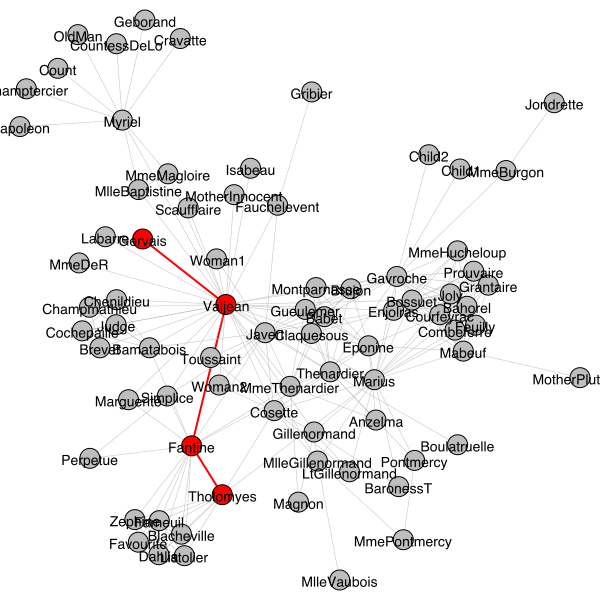

In [69]:
G.vs['color'] = 'gray'
vertex_path['color'] = 'red'

G.es['color'] = 'gray'
G.es['width'] = 0.5
edge_path['color'] = 'red'
edge_path['width'] = 2

ig.plot(G)

This only provides the actual length of the path (4 edges) rather than the actual path. We can also use this function to get the distance of all nodes to all other nodes. This is conveniently represented as a matrix, for which the numpy library is especially well suited.

In [70]:
distances = np.array(G.shortest_paths())
distances

array([[0, 1, 1, ..., 3, 3, 3],
       [1, 0, 2, ..., 4, 4, 4],
       [1, 2, 0, ..., 3, 3, 3],
       ...,
       [3, 4, 3, ..., 0, 2, 2],
       [3, 4, 3, ..., 2, 0, 2],
       [3, 4, 3, ..., 2, 2, 0]])

We can also compute the **diameter** of a network, which gives a good idea of the effective size of the network.

In [71]:
G.diameter()

5

## Betweeness Centrality

Betweeness centrality is based on the distances between vertices. It is (roughly) the number of geodesic paths that pass through any given node. Vertices with a high betweenness score will often act as bridging nodes between one or more communities.

In [72]:
g = ig.Graph.Famous('Zachary')
g.vs['color'] = 'gray'
g.es['color'] = 'gray'
g['layout'] = g.layout_auto()

In [73]:
g.betweenness()

[231.0714285714286,
 28.478571428571424,
 75.85079365079366,
 6.288095238095237,
 0.3333333333333333,
 15.833333333333334,
 15.833333333333332,
 0.0,
 29.529365079365082,
 0.44761904761904764,
 0.3333333333333333,
 0.0,
 0.0,
 24.215873015873015,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.1468253968254,
 0.0,
 0.0,
 0.0,
 9.299999999999999,
 1.1666666666666665,
 2.0277777777777777,
 0.0,
 11.79206349206349,
 0.9476190476190476,
 1.5428571428571427,
 7.60952380952381,
 73.00952380952378,
 76.69047619047619,
 160.5515873015873]

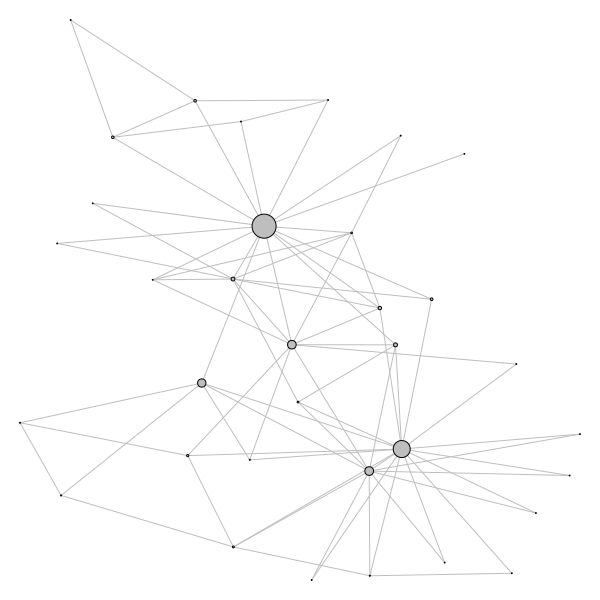

In [74]:
g.vs['centrality'] = g.betweenness(g.vs)
ig.plot(g, vertex_size=0.1*np.array(g.vs['centrality']) + 1)

## Eigenvector Centrality

The Eigenvector corresponding to the largest Eigenvalue of the adjacency matrix gives a high score to vertices that either have a lot of connections, or are connected to someone with a lot of connections.

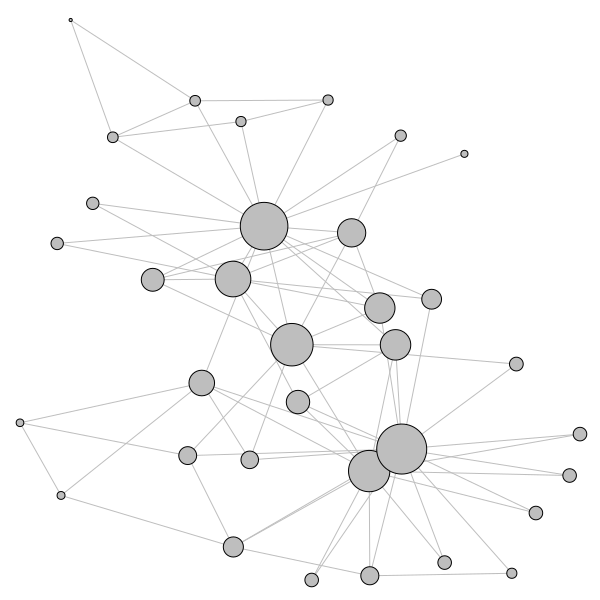

In [75]:
g.vs['centrality'] = g.eigenvector_centrality()
ig.plot(g, vertex_size=50*np.array(g.vs['centrality']))

## Pagerank

PageRank is the centrality measure used by Google to rank web pages. In fact *Page* refers to Larry Page, not a web page.
It has a damping (damping in igraph) term, this imagines that you will click a few links but will eventually give up. Then there is another parameter (personalized in igraph) that represents the chance that at any moment the search is abandoned and reset to a random vertex.

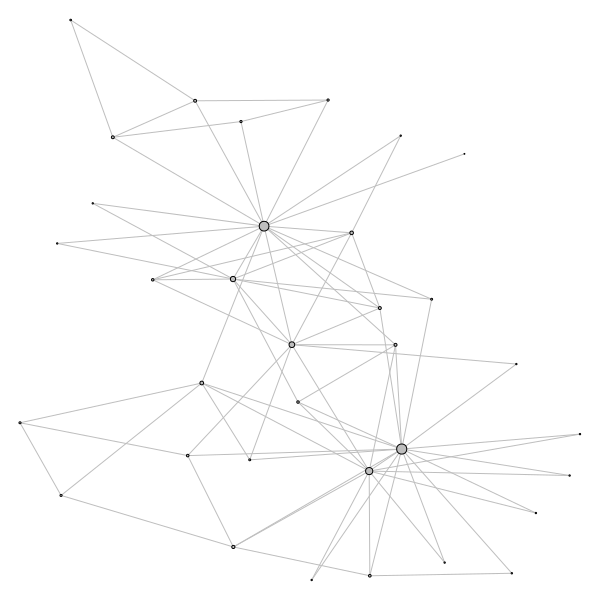

In [77]:
g.vs['centrality'] = g.pagerank()
ig.plot(g, vertex_size=100*np.array(g.vs['centrality']))

# EXCERCISE


For the **enron network**: Identify different positions in a hierarchy
1. Find the vertex with the highest degree

2. Plot a histogram of the shortest path lenghts between all vertices

3. Estimate degree distribution, closeness, betweeness, eigenvector & PageRank centralities

4. Plot the results of the different views of networks according to the previous measures

### Which insights can be derived?


In [2]:
import igraph as ig

# Networks
#import igraph as ig

# Computation
import numpy as np
np.random.seed(0)
import scipy
import random
random.seed(0)

# Data
import pandas as pd
import csv

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [4]:
G = ig.Graph.Read("data/enron.gml", format="gml")

for v in range(1, G.vcount()):
    if (G.degree(v) == G.maxdegree(loops=True)):
        print("The vertex with the highest degree is: ")
        print("Id: ", G.vs[v]["id"])
        print("Label: ", G.vs[v]["label"], "\n")
        print("His degree is ", G.degree(v), '.')

The vertex with the highest degree is: 
Id:  4479.0
Label:  sally.beck@enron.com 

His degree is  1835 .


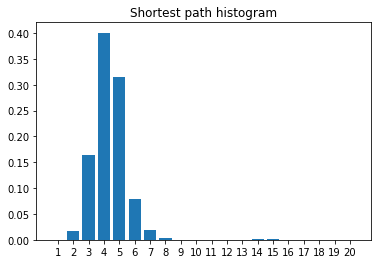

In [3]:
enrom_hist = G.path_length_hist(directed=True)

bins = []
values = []

for bin in enrom_hist.bins():
    values.append(bin[2])
    bins.append(bin[0])

bins = np.array(bins)
bins = bins.astype(int)
values = np.array(values)

values = values / np.sum(values)

plt.bar(bins, values)
# label on x
plt.xticks(bins, bins)
plt.title("Shortest path histogram")
plt.show()


In [7]:
# closeness
closeness = G.closeness(mode="OUT", weights=G.es.get_attribute_values('weight'))
np.save('out/closeness.npy', closeness)

#G.closeness(mode="OUT", weights=G.es.get_attribute_values('weight'))

# betweenness
betweeness = G.betweenness()
np.save('out/betweeness.npy', betweeness)
#ig.plot(G, vertex_size = 0.1*np.array(G.vs['centrality']) + 1)


# eigenvector_centrality
eigenvector_centrality = G.eigenvector_centrality()
np.save('out/eigenvector_centrality.npy', eigenvector_centrality)
#ig.plot(G, vertex_size = 50*np.array(G.vs['centrality']))


# pagerank
pagerank = G.pagerank()

np.save('out/pagerank.npy', pagerank)
#ig.plot(G, vertex_size = 100*np.array(G.vs['centrality']))

In [11]:
# degree distribution
closeness = np.load('out/closeness.npy')
print(closeness)

betweeness = np.load('out/betweeness.npy')
print(betweeness)

eigenvector_centrality = np.load('out/eigenvector_centrality.npy')
print(eigenvector_centrality)

pagerank = np.load('out/pagerank.npy')
print(pagerank)

[1.26824690e-05 3.52933296e-05 1.26824690e-05 ... 1.26824690e-05
 1.26824690e-05 1.26824690e-05]
[   0.         5736.56025471    0.         ...    0.            0.
    0.        ]
[4.99269006e-03 1.48765475e-04 0.00000000e+00 ... 4.72522984e-04
 8.20904567e-05 9.67578267e-03]
[1.18654741e-05 8.81166084e-06 8.37404738e-06 ... 9.18421949e-06
 8.19468755e-06 1.07646320e-05]


In [ ]:
# plot 
ig.plot(G, vertex_size = 100*np.array(eigenvector_centrality))